# **IMPORTING THE NECESSARY LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
takehome_user_engagement = pd.read_csv("/Users/muralik/Desktop/Datasets/takehome_user_engagement.csv")
takehome_users = pd.read_csv("/Users/muralik/Desktop/Datasets/takehome_users.csv")
takehome_user_engagement.head(5)

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [3]:
takehome_user_engagement.shape

(207917, 3)

In [4]:
takehome_users.head(5)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [5]:
takehome_users.shape

(12000, 10)

In [6]:
takehome_user_engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [7]:
def get_date_int(df, column):
    '''
    This handy function parses year,month,week,day.
    '''
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

def get_week(x): return x.isocalendar()

def get_iso_date_int(df,column):
    '''
    With time coded as iso (year,week,day) this seperates those time periods.
    '''
    temp_df=pd.DataFrame(df[column].tolist(), index=df.index)
    year,week,day=temp_df[0],temp_df[1],temp_df[2]
    return year,week,day

In [8]:
takehome_users = pd.read_csv('/Users/muralik/Desktop/Datasets/takehome_users.csv',encoding='ISO-8859-1')
takehome_users.creation_time = pd.to_datetime(takehome_users['creation_time'])
takehome_users.last_session_creation_time = pd.to_datetime(takehome_users['last_session_creation_time'])
takehome_users['user_id'] = takehome_users['object_id']
takehome_users.drop('object_id', axis=1, inplace=True)
takehome_users.drop(['name', 'email'], axis=1, inplace=True)

takehome_users.head()

,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,user_id
0,2014-04-22 03:53:30,GUEST_INVITE,1970-01-01 00:00:01.398138810,1,0,11,10803.0,1
1,2013-11-15 03:45:04,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0,2
2,2013-03-19 23:14:52,ORG_INVITE,1970-01-01 00:00:01.363734892,0,0,94,1525.0,3
3,2013-05-21 08:09:28,GUEST_INVITE,1970-01-01 00:00:01.369210168,0,0,1,5151.0,4
4,2013-01-17 10:14:20,GUEST_INVITE,1970-01-01 00:00:01.358849660,0,0,193,5240.0,5


In [9]:
takehome_user_engagement['time_stamp'] = pd.to_datetime(takehome_user_engagement['time_stamp'])
takehome_user_engagement['week_time_stamp']=takehome_user_engagement['time_stamp'].apply(get_week)

In [10]:
print('First user engagement timestamp:',min(takehome_user_engagement.time_stamp))
print('Last user engagement timestamp:',max(takehome_user_engagement.time_stamp))

First user engagement timestamp: 2012-05-31 08:20:06
Last user engagement timestamp: 2014-06-06 14:58:50


In [11]:
year, month, day=get_date_int(takehome_user_engagement, 'time_stamp')
takehome_user_engagement['year'],takehome_user_engagement['month'],takehome_user_engagement['day']=year,month,day
takehome_user_engagement['week']=takehome_user_engagement['time_stamp'].dt.week
iso_year,iso_week,iso_day=get_iso_date_int(takehome_user_engagement,'week_time_stamp')
takehome_user_engagement['year_week']=list(zip(iso_year,iso_week))

/var/folders/y_/p61tjgy50cn618ls_r8mtps80000gn/T/ipykernel_1415/816532265.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  takehome_user_engagement['week']=takehome_user_engagement['time_stamp'].dt.week


In [12]:
takehome_user_engagement=takehome_user_engagement.sort_values(['time_stamp','user_id'],ascending=True)
takehome_user_engagement=takehome_user_engagement[['user_id','visited','day','year_week']]

In [13]:
adopted_user_dict={}
weeks=takehome_user_engagement.year_week
user_ids=list(set(takehome_user_engagement['user_id']))
for i in range(len(user_ids)):
    user_id=user_ids[i]
    reduced_df=takehome_user_engagement[(takehome_user_engagement['user_id']==user_id)&(weeks.isin(weeks[weeks.duplicated()]))]
    week_counts=reduced_df.year_week.value_counts()[reduced_df.year_week.value_counts()>2]
    three_logins=reduced_df[reduced_df.year_week.isin(list(week_counts.index))]
    three_logins=three_logins[~three_logins.duplicated()]
    adopted_user_dict[str(user_id)]=len(three_logins)

In [14]:
takehome_user_engagement['engagement_index']=takehome_user_engagement['user_id'].apply(lambda x: adopted_user_dict[str(x)])
takehome_user_engagement['adopted_user']=0
takehome_user_engagement['adopted_user'][takehome_user_engagement['engagement_index']>0]=1

/var/folders/y_/p61tjgy50cn618ls_r8mtps80000gn/T/ipykernel_1415/2498099110.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  takehome_user_engagement['adopted_user'][takehome_user_engagement['engagement_index']>0]=1


In [15]:
adopted_count=takehome_user_engagement[['user_id','adopted_user']][takehome_user_engagement['adopted_user']==1].groupby('user_id').count()
print('Number of adopted users:',len(adopted_count))

Number of adopted users: 1445


In [16]:
adopted=takehome_user_engagement[['user_id','adopted_user']]
adopted_users = pd.merge(takehome_users, adopted, on='user_id', how='outer')

In [17]:
creation_year, creation_month, creation_day=get_date_int(adopted_users, 'creation_time')
last_session_year, last_session_month, last_session_day=get_date_int(adopted_users, 'last_session_creation_time')
adopted_users['creation_year'],adopted_users['creation_month'],adopted_users['creation_day']=creation_year, creation_month, creation_day
adopted_users['last_session_year'],adopted_users['last_session_month'],adopted_users['last_session_day']=last_session_year, last_session_month, last_session_day
adopted_users.drop(['creation_time', 'last_session_creation_time', 'user_id'], axis=1, inplace=True)

**MACHINE LEARNING MODEL**

In [18]:
adopted_users.last_session_day.fillna(0, inplace=True)
adopted_users.last_session_month.fillna(0, inplace=True)
adopted_users.last_session_year.fillna(0, inplace=True)

In [21]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
adopted_users['creation_source']=label.fit_transform(adopted_users['creation_source'])

In [22]:
adopted_users['invited'] = np.where(adopted_users['invited_by_user_id'].isnull(), 1, 0)
adopted_users.drop('invited_by_user_id', axis=1, inplace=True)
adopted_users=adopted_users.fillna(0)
col_names=list(pd.Series(adopted_users.columns)[pd.Series(adopted_users.columns)!='adopted_user'])
X=adopted_users[list(pd.Series(adopted_users.columns)[pd.Series(adopted_users.columns)!='adopted_user'])].values
y=adopted_users['adopted_user'].values

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25,random_state=42)

Accuracy: 0.9999305204648813 

Feature ranking:


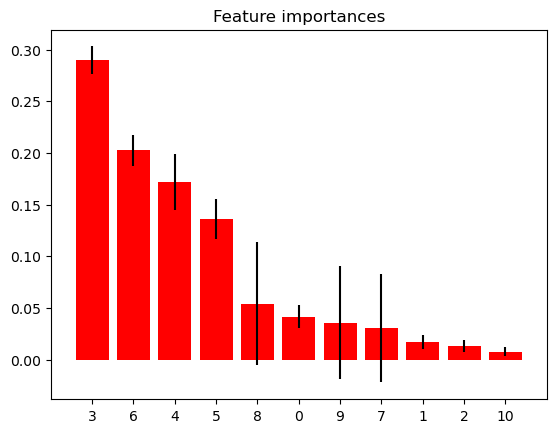

,features,importance
3,org_id,0.289649
6,creation_day,0.202545
4,creation_year,0.172149
5,creation_month,0.135925
8,last_session_month,0.054055
0,creation_source,0.041649
9,last_session_day,0.035829
7,last_session_year,0.030360
1,opted_in_to_mailing_list,0.017005
2,enabled_for_marketing_drip,0.013269


In [26]:
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, roc_auc_score, make_scorer
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=20,random_state=0,criterion='gini', class_weight='balanced')
clf.fit(X_train, y_train.ravel())
Accuracy=clf.score(X_train, y_train.ravel())
print('Accuracy:',Accuracy,'\n')
importFeature = clf.feature_importances_
feature_importances=pd.DataFrame([importFeature])
std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0)
indices = np.argsort(importFeature)[::-1]
print("Feature ranking:")
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importFeature[indices],color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()
feature_importances=pd.DataFrame(pd.Series(col_names)[indices])
feature_importances['importance']=np.sort(importFeature)[::-1]
feature_importances.columns=['features','importance']
feature_importances